In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
from matplotlib import animation, rc
from IPython.display import HTML, display
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.2)

In [3]:
#Define variable
a0,v0,x0,t0,t = sp.symbols('a_0,v_0,x_0,t_0,t')
#Define functions
v = lambda t: v0 + a0*(t-t0)
#velocity with undefined parameters:
display(v(t))

a_0*(t - t_0) + v_0

In [4]:
#Define parameters:
a0 = -10.
v0 = 25.
t0 = 0.
x0 = 0.
#Trajectory with parameters defined:
display(v(t))

25.0 - 10.0*t

### Show 1D movement:

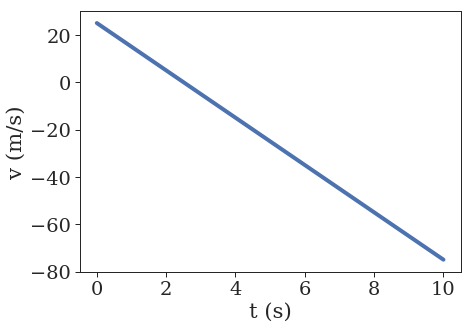

In [6]:
#Define list of points for time:
tmin,tmax = t0,10.
tpts = np.linspace(tmin,tmax,100)
#Convert analytical function in numerical:
vF = sp.lambdify(t,v(t))

#Plot velocity:
fig = plt.figure(figsize=(7,5))
plt.plot(tpts,vF(tpts),linewidth=4)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('v (m/s)')
plt.tight_layout()

### Compute position from velocity

In [7]:
fig = plt.figure(figsize=(20,7))
ax1 = plt.subplot(121)
ax1.plot(tpts,vF(tpts),linewidth=4)
ax1.plot([tmin,tmax],[0.,0.],'--',linewidth=1.5,color='black')
xlabel = ax1.set_xlabel('t (s)')
ylabel = ax1.set_ylabel('v (m/s)')
ax2 = plt.subplot(122)
# xline, = ax2.plot(tpts,xF(tpts),linewidth=4,alpha=0.0)
ax2.set_xlim(tmin,tmax)
xmin,xmax = -300,60
ax2.set_ylim(xmin,xmax)
xlabel = ax2.set_xlabel('t (s)')
ylabel = ax2.set_ylabel('x (m/s)')
dt = 1.0
tA = 0.
tB = tA + dt
vA, vB = vF(tA), vF(tB)
tlist = [tA,tB]
vm = vF(tA)
line2, = ax1.fill([tA,tA,tB,tB],[0.,vm,vm,0.],'--',linewidth=2,alpha=0.4)
pts, = ax1.plot([tA,tB],[vA,vB],'o',markersize=10)
text = ax1.text(3, 20, "")
xpts = [0.]
xpts.append(xpts[-1]+vm*dt)
pts2, = ax2.plot(tlist,xpts,'o--',markersize=10,linewidth=2)

def init():
    line2.set_xy([(0.,0.)])
    pts.set_data([], [])
    pts2.set_data([],[])
    text.set_text("")
    return (line2,pts,pts2)
def animate(i):
    tlist = np.linspace(tmin,tmin+dt*(i+1),i+2,endpoint=True)
    vlist = vF(tlist)
    pts.set_data(tlist,vlist)
    tA, tB = tlist[-2],tlist[-1]
    vm = (vF(tB)+vF(tA))/2.
    line2.set_xy([(tA,0.),(tA,vm),(tB,vm),(tB,0.)])
    text.set_text(r'$\bar{v}=%1.2f$ m/s, $\Delta x = %1.2f$ m' %(vm,vm*dt))
    xlist = [0.]
    for i,v in enumerate(vlist[:-1]):
        vm = (vlist[i+1]+v)/2.
        xlist.append(xlist[-1]+vm*dt)
    pts2.set_data(tlist,xlist)  
    return (line2,pts,pts2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=600, 
                               blit=True)
plt.close()
anim

### Exact solution (using calculus)

In [8]:
x = sp.integrate(v(t),t)
#Trajectory with undefined parameters:
display(x)

-5.0*t**2 + 25.0*t

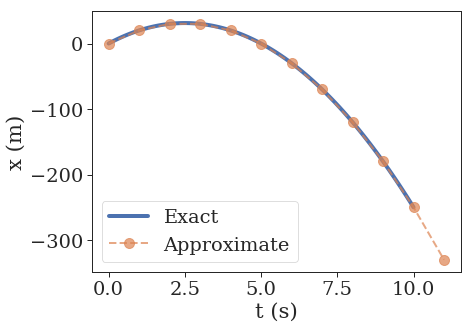

In [20]:
#Convert analytical function in numerical:
xF = sp.lambdify(t,x)
#Get points from approximation:
_,_,pts2 = animate(int((tmax-tmin)/dt))


#Plot trajectory
fig = plt.figure(figsize=(7,5))
plt.plot(tpts,xF(tpts),linewidth=4,label='Exact')
plt.plot(pts2.get_xdata(),pts2.get_ydata(),'o--',label='Approximate',markersize=10,linewidth=2,alpha=0.7)
xlabel = plt.xlabel('t (s)')
ylabel = plt.ylabel('x (m)')
plt.legend()
plt.tight_layout()

#### Generic expression (for t0 = 0!)

In [40]:
#Define variable
a0,v0,x0,t0,t,tp = sp.symbols('a_0,v_0,x_0,t_0,t,tp', real=True)
t0 = 0.
#Define functions
v = lambda t: v0 + a0*(t-t0)
#velocity with undefined parameters:
display(v(t))

a_0*t + v_0

In [42]:
x = sp.integrate(v(tp),(tp,t0,t))+x0
#Trajectory with undefined parameters:
display(x)

a_0*t**2/2 + t*v_0 + x_0